In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
from tqdm import tqdm
import json

## 1. Data Collection and Preprocessing

In [ ]:
def extract_landmarks(image_path):
    """Extract hand landmarks from an image using MediaPipe"""
    # Initialize MediaPipe Hands
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=1,
        min_detection_confidence=0.5
    )

    # Read image
    image = cv2.imread(image_path)
    if image is None:
        return None

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image
    results = hands.process(image_rgb)

    # Extract landmarks
    landmarks = []
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                landmarks.extend([landmark.x, landmark.y, landmark.z])

    hands.close()
    return landmarks if landmarks else None

In [ ]:
def process_dataset(data_dir):
    """Process all images in the dataset directory"""
    data = []
    labels = []

    # Iterate through gesture folders
    for gesture_name in os.listdir(data_dir):
        gesture_dir = os.path.join(data_dir, gesture_name)
        if not os.path.isdir(gesture_dir):
            continue

        print(f"Processing {gesture_name}...")

        # Process each image in the gesture folder
        for image_name in tqdm(os.listdir(gesture_dir)):
            if not image_name.endswith(('.jpg', '.png')):
                continue

            image_path = os.path.join(gesture_dir, image_name)
            landmarks = extract_landmarks(image_path)

            if landmarks:
                data.append(landmarks)
                labels.append(gesture_name)

    return np.array(data), np.array(labels)

## 2. Model Training

In [ ]:
def train_model(X, y):
    """Train and evaluate the Random Forest classifier"""
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Initialize and train the model
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Evaluate the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)

    # Generate predictions
    y_pred = model.predict(X_test)

    return model, {
        'train_score': train_score,
        'test_score': test_score,
        'cv_scores': cv_scores,
        'y_test': y_test,
        'y_pred': y_pred
    }

## 3. Model Evaluation and Visualization

In [ ]:
def plot_confusion_matrix(y_test, y_pred, classes):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
def plot_feature_importance(model, feature_names):
    """Plot feature importance"""
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title('Feature Importance')
    plt.bar(range(len(importance)), importance[indices])
    plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

## 4. Main Execution

Processing two...


100%|██████████| 1000/1000 [01:21<00:00, 12.29it/s]


Processing four...


100%|██████████| 1000/1000 [01:16<00:00, 13.04it/s]


Processing five...


100%|██████████| 1000/1000 [01:15<00:00, 13.17it/s]


Processing nine...


100%|██████████| 1000/1000 [01:14<00:00, 13.35it/s]


Processing right...


100%|██████████| 1000/1000 [01:16<00:00, 13.09it/s]


Processing six...


100%|██████████| 1000/1000 [01:15<00:00, 13.27it/s]


Processing left...


100%|██████████| 1000/1000 [01:15<00:00, 13.26it/s]


Processing zero...


100%|██████████| 1000/1000 [01:14<00:00, 13.36it/s]


Processing eight...


100%|██████████| 1000/1000 [01:16<00:00, 13.11it/s]


Processing seven...


100%|██████████| 1000/1000 [01:15<00:00, 13.23it/s]


Processing three...


100%|██████████| 1000/1000 [01:16<00:00, 13.14it/s]


Processing one...


100%|██████████| 1000/1000 [01:14<00:00, 13.42it/s]


Processing down...


100%|██████████| 1000/1000 [01:10<00:00, 14.17it/s]


Processing stop...


100%|██████████| 1000/1000 [01:14<00:00, 13.39it/s]


Processing up...


100%|██████████| 1000/1000 [01:13<00:00, 13.58it/s]


Training Score: 1.0000
Testing Score: 0.9986
Cross-validation Scores: [0.99928699 0.99857398 0.99857398 0.99750357 0.99714693]
Mean CV Score: 0.9982

Classification Report:
              precision    recall  f1-score   support

        down       1.00      1.00      1.00       171
       eight       1.00      1.00      1.00       299
        five       1.00      1.00      1.00       299
        four       1.00      0.99      1.00       300
        left       1.00      1.00      1.00       306
        nine       0.99      1.00      1.00       276
         one       1.00      0.99      0.99       264
       right       1.00      1.00      1.00       315
       seven       1.00      1.00      1.00       305
         six       1.00      1.00      1.00       282
        stop       1.00      1.00      1.00       271
       three       0.99      1.00      1.00       300
         two       1.00      1.00      1.00       301
          up       1.00      1.00      1.00       241
        zero    

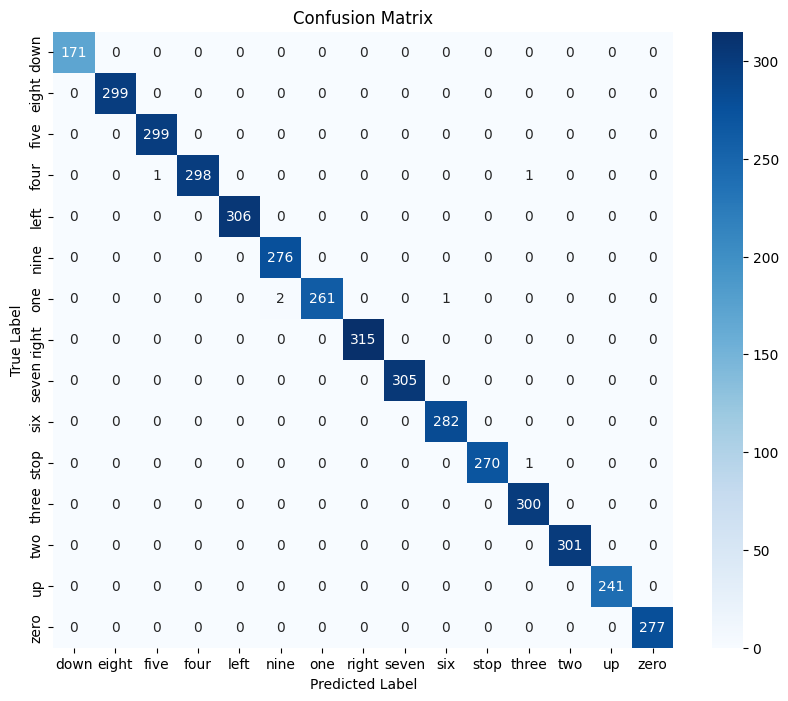

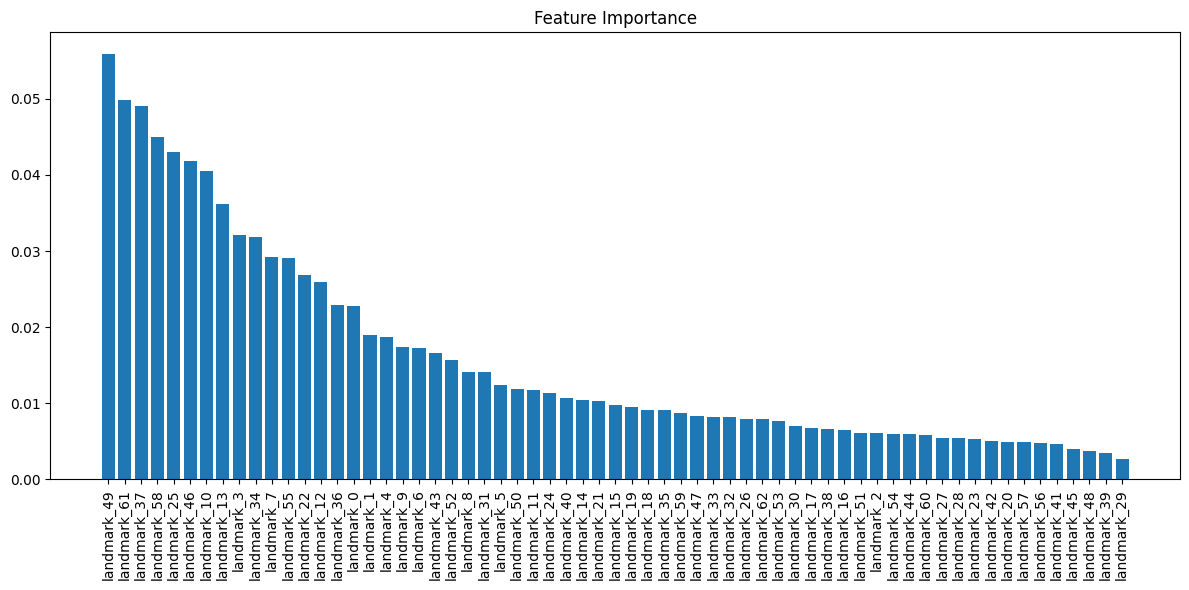

In [ ]:
# Set data directory
data_dir = '/kaggle/input/hand-gesture-recognition-dataset-one-hand/Dataset_RGB/Dataset_RGB'

# Process dataset
X, y = process_dataset(data_dir)

# Train model
model, results = train_model(X, y)

# Print results
print(f"Training Score: {results['train_score']:.4f}")
print(f"Testing Score: {results['test_score']:.4f}")
print(f"Cross-validation Scores: {results['cv_scores']}")
print(f"Mean CV Score: {np.mean(results['cv_scores']):.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(results['y_test'], results['y_pred']))

# Plot confusion matrix
plot_confusion_matrix(results['y_test'], results['y_pred'], np.unique(y))

# Save the model
os.makedirs('models', exist_ok=True)
joblib.dump(model, 'models/hand_gesture_classifier.joblib')

# Save feature names
feature_names = [f'landmark_{i}' for i in range(X.shape[1])]
plot_feature_importance(model, feature_names)